## LMRO Clustering Analysis

First lets import the packages needed to build the clusters

In [5]:
# Import functions
import json
import networkx as nx
import numpy as np
from itertools import count, groupby
# import matplotlib as plt


# # Import custom libraries
from qaoa_vrp.utils import read_instance
from qaoa_vrp.build_graph import *
from qaoa_vrp.build_circuit import build_qubos,qubo_to_qaoa
import qaoa_vrp.clustering as clustering


from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

np.random.seed(0)

Import data from test case

In [7]:
data, num_vehicles = read_instance('../data/instanceType_complete_numNodes_5_numVehicles_1_015512e0b9664214abd00f35ae9bf9ca.json')
# print data nicely if you want
print(json.dumps(data, indent=4))


{
    "nodes": [
        {
            "tag": "Depot",
            "id": 0
        },
        {
            "tag": "",
            "id": 1
        },
        {
            "tag": "",
            "id": 2
        },
        {
            "tag": "",
            "id": 3
        },
        {
            "tag": "",
            "id": 4
        }
    ],
    "edges": [
        {
            "cost": 8.7,
            "id": "45fbb37ad49b4f0480573eb73007aac4",
            "source": 0,
            "target": 1
        },
        {
            "cost": 9.68,
            "id": "a345d717b4414a358cbc458731bf143f",
            "source": 0,
            "target": 2
        },
        {
            "cost": 6.36,
            "id": "1132481706e940309048f1d0a3c22f70",
            "source": 0,
            "target": 3
        },
        {
            "cost": 9.95,
            "id": "102d7f247d234c3cb2844f9279fb1c26",
            "source": 0,
            "target": 4
        },
        {
            "cost": 4.83,
  

Read in the `test` graph from JSON and build a cost matrix and the graph using `networkX`

In [8]:
G, depot_info = build_json_graph(data)

Awesome, let's look at our graph

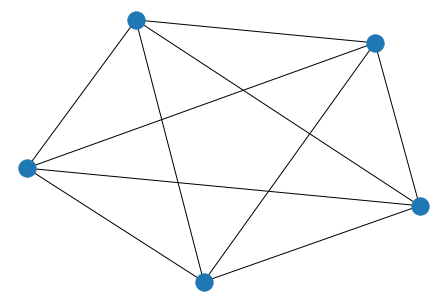

In [9]:
nx.draw(G)

Since we're going to be separating the nodes into different clusters for our VRP, let's remove the depot from our graph. **BUT** the information ab

In [10]:
depot_edges = list(G.edges(depot_info['id'], data=True))
depot_node = depot_info['id']

In [11]:
G.remove_node(depot_info['id'])

We can now construct the cost and adjacency matrices

In [12]:
edge_mat = nx.linalg.graphmatrix.adjacency_matrix(G).toarray() # Adjacency Matrix
cost_mat = np.array(nx.attr_matrix(G, edge_attr="cost", rc_order=list(G.nodes()))) # Cost Matrix

Let's have a look at the edge matrix and cost matrix

In [13]:
edge_mat

array([[0, 1, 1, 1],
       [1, 0, 1, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 0]])

In [14]:
cost_mat

array([[0.  , 4.83, 6.84, 2.29],
       [4.83, 0.  , 9.16, 4.97],
       [6.84, 9.16, 0.  , 1.03],
       [2.29, 4.97, 1.03, 0.  ]])

Let's use spectral clustering to cluster the nodes!

In [15]:
G, cluster_mapping = clustering.create_clusters(G,num_vehicles, "spectral-clustering", edge_mat)
for node in G.nodes(data=True):
    print(node)

(1, {'cluster': 1})
(2, {'cluster': 1})
(3, {'cluster': 1})
(4, {'cluster': 1})


In [28]:
cluster_mapping

array([0, 0, 0, 0])

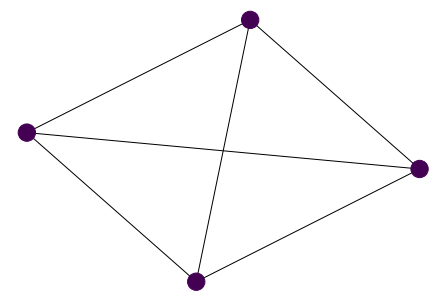

In [16]:
nx.draw(G, node_color=cluster_mapping)

In [17]:
subgraphs = clustering.build_sub_graphs(G, depot_node, depot_edges)

[1, 1, 1, 1, 0]


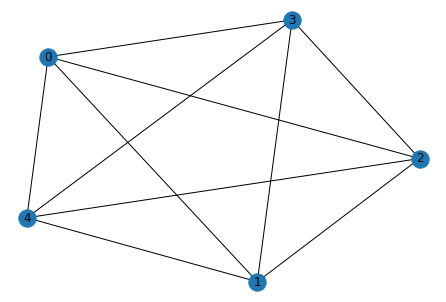

In [18]:
clustering.draw_sub_graph(subgraphs[1])

NameError: name 'num_cities' is not defined

In [33]:
G.graph

{'instance_type': 'watts_strogatz', 'num_vehicles': 1}